In [1]:
import pandas as pd
import numpy as np

pd.set_option('max_rows', 5)

recipes = pd.read_csv("data\epi_r.csv")
print(recipes.shape[0])
recipes.head()

20052


,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# filter recipes with more than 10 000 calories
recipes = recipes[recipes['calories'] < 10000]

# drop rows with NaN
recipes = recipes[recipes['calories'].notna()]
recipes = recipes[recipes['dessert'].notna()]

print(recipes.shape[0])

15914


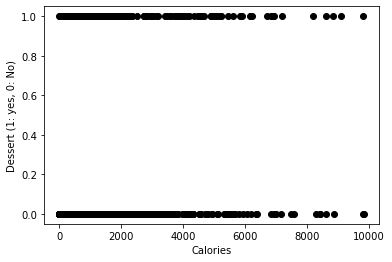

In [3]:
import matplotlib.pyplot as plt

x=recipes['calories']
y=recipes['dessert']

plt.scatter(x=recipes['calories'], y=recipes['dessert'], c ="black")
plt.ylabel("Dessert (1: yes, 0: No)")
plt.xlabel("Calories")
plt.show()
plt.close()

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr')

X = x.values.reshape(-1,1)
model.fit(X, y)

LogisticRegression(multi_class='ovr')

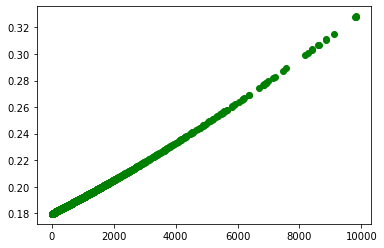

In [5]:
# Alternative using sklearn
plt.scatter(x,model.predict_proba(X)[:,1], c="green")
plt.show()
plt.close()

In [6]:
# Alternative using statsmodels 
# from https://stackoverflow.com/questions/47414842/confidence-interval-of-probability-prediction-from-logistic-regression-statsmode

<AxesSubplot:xlabel='calories', ylabel='dessert'>

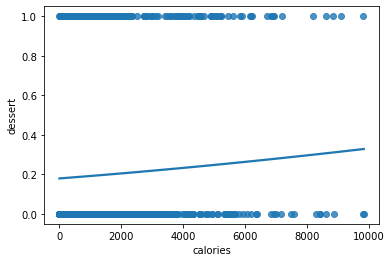

In [7]:
# Alternative using seaborn
import seaborn as sns

sns.regplot(x=x, y=y, data=recipes, logistic=True, ci=None)

In [10]:
import pandas as pd
import numpy as np

pd.set_option('max_rows', 5)

weather = pd.read_csv("data\weatherHistory.csv")
recipes.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [37]:
# Is there a relationship between humidity and temperature?
temp = weather['Temperature (C)']
hum = weather['Humidity']
df = weather[['Temperature (C)', 'Humidity']]

pd.set_option('max_rows', 8)

missing_values_count = df.isnull().sum()
print(missing_values_count)

df.describe()

Temperature (C)    0
Humidity           0
dtype: int64


,Temperature (C),Humidity
count,96453.000000,96453.000000
mean,11.932678,0.734899
std,9.551546,0.195473
min,-21.822222,0.000000
25%,4.688889,0.600000
50%,12.000000,0.780000
75%,18.838889,0.890000
max,39.905556,1.000000


In [38]:
from scipy import stats

# Removing outliers
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df.describe()

,Temperature (C),Humidity
count,96390.000000,96390.000000
mean,11.948572,0.735078
std,9.526739,0.195157
min,-16.705556,0.150000
25%,4.722222,0.600000
50%,12.011111,0.780000
75%,18.838889,0.890000
max,39.588889,1.000000


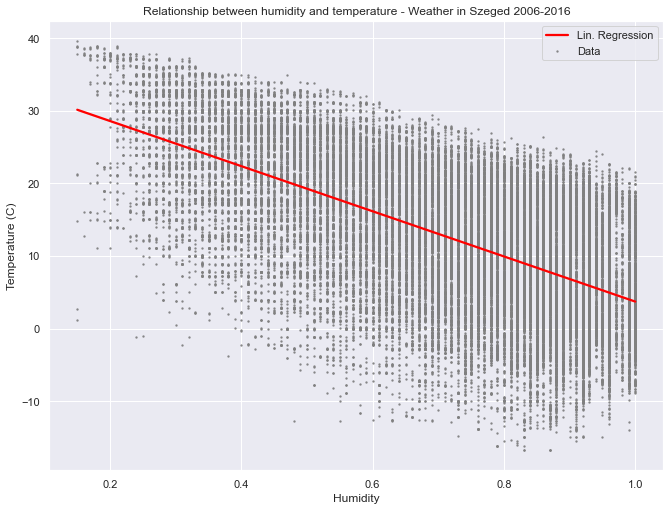

In [48]:
sns.set(rc={'figure.figsize':(11,8.27)})
plot = sns.regplot(x="Humidity", y="Temperature (C)", data=df, ci=95, marker='o', color='red', scatter_kws={'s':2, "color": "grey"}, line_kws={"color": "red"});

# parameters:
# https://seaborn.pydata.org/generated/seaborn.regplot.html

plt.title("Relationship between humidity and temperature - Weather in Szeged 2006-2016")
plt.legend(loc='upper right', labels=['Lin. Regression', 'Data'])
plt.show(plot)